# Ellipsoid Algorithm

<code>Code from Prof. Shekhar</code>

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# Define the objective function
def f(x,y):
    return -np.log(x*y)

# Define the constraint functions
def h(x,y):
    return np.max(cons(x,y))

def cons(x,y):
    return np.array([-x, -y, x + y**2 - 2])

# Define the gradients
def Df(x,y):
    return np.array([[-1/x, -1/y]]).T

def Dg(x,y):
    
    # Find out how many constraints are active
    active_cons = np.isclose(cons(x,y), h(x,y), 1e-10, 1e-10)
    active_cons.shape = (1,3)
    
    # Compute the subdifferential (the normal gradient if only one constraint 
    # is active, and the average (convex sum) of the two if two constraints are active)
    gradient = active_cons @ np.array([[-1, 0, 1],[0,-1,2*y]]).T / np.count_nonzero(active_cons)
    
    return gradient.T

In [2]:
k = 0
eta = np.inf
epsilon = 1e-7

A = np.diag([4, 2])
x = 0
y = 0
ellipses = list()


def ellipse_points(A, x, y):
    angles = np.atleast_2d(np.linspace(0,100,101))/ 100  * 2 * np.pi 
    return np.kron(np.array([[x,y]]).T, np.ones([1,101]))\
    + la.sqrtm(A) @ np.concatenate((np.cos(angles),np.sin(angles)))

while True:
    ellipses.append(ellipse_points(A,x,y))
    if all([h(x,y) <= 0, x != 0, y != 0]):
        g = Df(x,y)
    else:
        g = Dg(x,y)
    eta = np.sqrt(g.T @ A @ g)
    # If tolerance met, or infeasible then quit
    if eta < epsilon:
        break
    elif h(x,y) - eta > 0:
        print("Infeasible\n")
        break
    
    X = np.array([[x],[y]])
    X = X - 1/3 * (A @ g) / eta
    A = 4/3 * (A - 2/3 * (A @ g @ g.T @ A) / (g.T @ A @ g))
    x, y = X.flatten()
    k = k + 1

print(f"Ellipsoid algorithm converged after {k} steps. \nOptimum achieved at ({x},{y})")

Ellipsoid algorithm converged after 94 steps. 
Optimum achieved at (1.3333258144592006,0.8165011812966202)


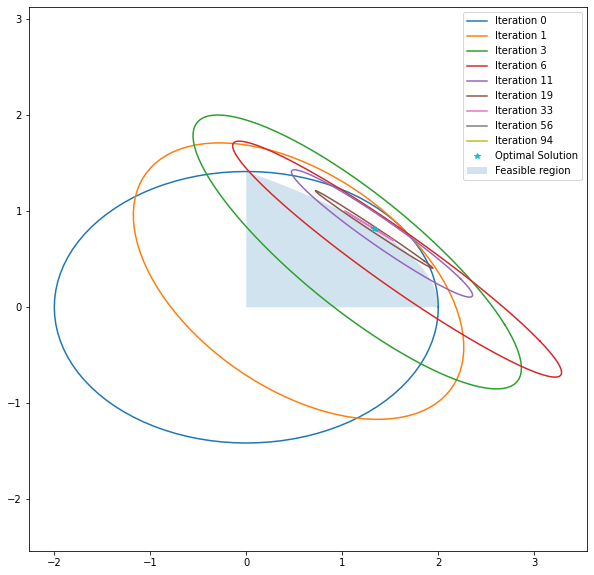

In [3]:
plt.figure(figsize=(10,10))

# Plot the feasible region
curve = np.linspace(0,np.sqrt(2))
plt.fill_betweenx(curve, -curve**2 + 2, alpha=0.2)

# Choose the ellipses to plot
iteration_indices = np.unique(np.logspace(0,np.log10(len(ellipses)),10).astype(int) - 1)

for i in iteration_indices:
    plt.plot(ellipses[i][0], ellipses[i][1])

legend_str = [f"Iteration {index}" for index in iteration_indices]\
            + ["Optimal Solution", "Feasible region"]
plt.plot(x,y,'*')
plt.legend(legend_str)
plt.axis('equal')
plt.show()